In [1]:
# load libraries

import os
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from ggplot import *

In [2]:
## check current working directory
os.getcwd()

'C:\\Users\\on846\\Downloads\\Edwisor notes\\Predictive analysis using R and Python_Module_2\\Analytics Basics'

In [3]:
#change current wrking directory
os.chdir("C:\\Users\\on846\\Downloads\\Edwisor notes\\Project_3\\Project_details")

In [4]:
# load data
df = pd.read_csv("heart.csv")

In [5]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
##################Exploratory data Analysis#########################

cat_names =['sex','cp','fbs','restecg','exang','slope','thal']
cont_names =['age','trestbps','chol','thalach','oldpeak','ca']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.target.value_counts()### count of target variable

1    165
0    138
Name: target, dtype: int64

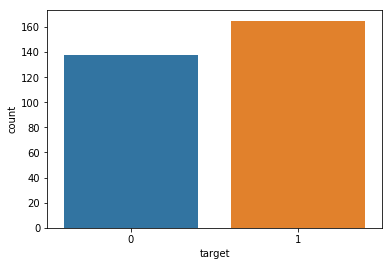

In [10]:
sns.countplot(x='target',data =df)### plot of count of target variable

In [11]:
########################## data pre processing ########################################

# missing values 

df.isnull().sum()### There are no missing values so we will move forward

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Feature Selection

In [12]:
### Feature selection (Correlation analysis for continuous variable and chi-square test for categorical)

# correlation analysis..

df_corr = df.loc[:,cont_names]

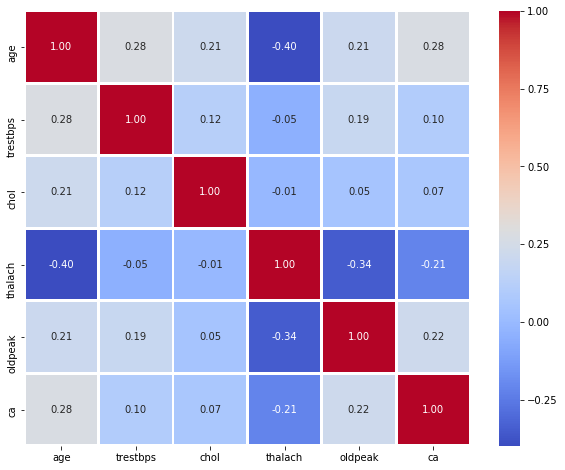

In [13]:
# plot the correlation analysis

plt.figure(figsize=(10,8))
sns.heatmap(df_corr.corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidths=2)

In [14]:
cont_names ### now we will check the correlation among the variables using seaborn library and drawing jointplot

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

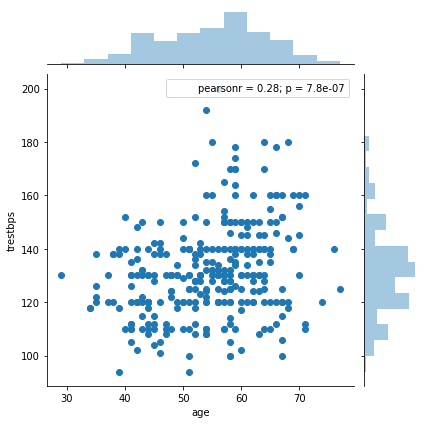

In [15]:
sns.jointplot(x='age',y='trestbps',data =df)

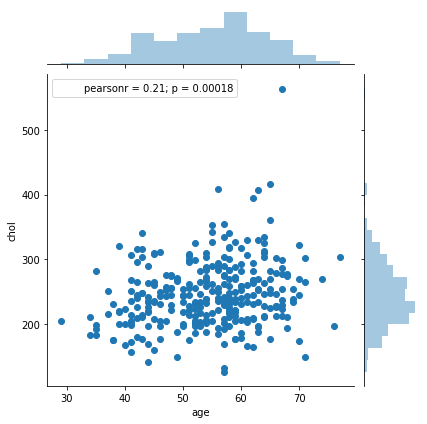

In [16]:
sns.jointplot(x='age',y='chol',data =df)

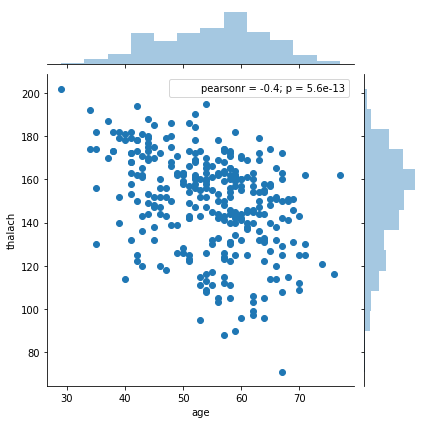

In [17]:
sns.jointplot(x='age',y='thalach',data =df)

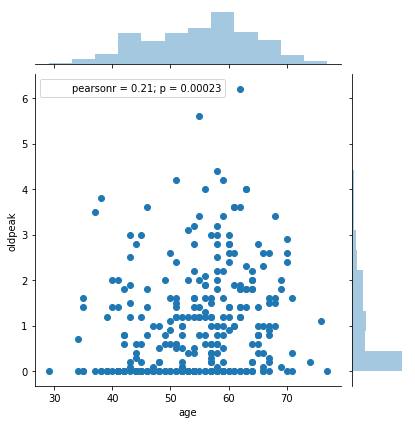

In [18]:
sns.jointplot(x='age',y='oldpeak',data =df)

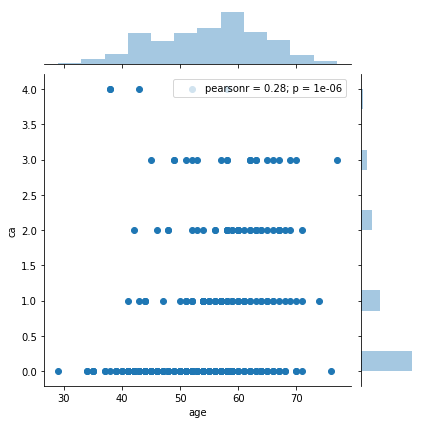

In [19]:
sns.jointplot(x='age',y='ca',data =df)

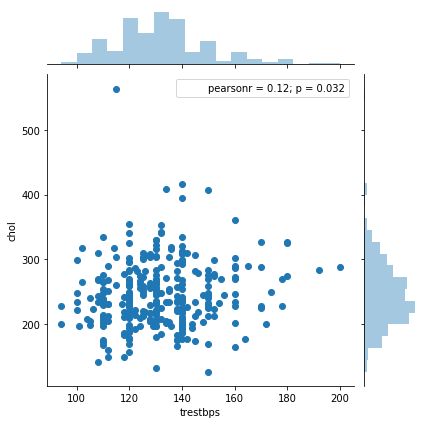

In [20]:
sns.jointplot(x='trestbps',y='chol',data =df)

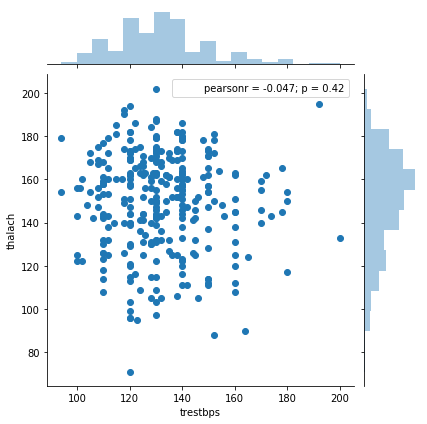

In [21]:
sns.jointplot(x='trestbps',y='thalach',data =df)

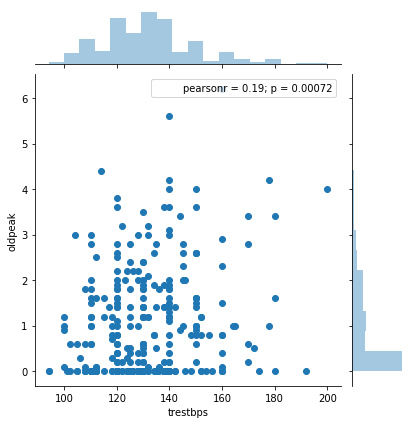

In [22]:
sns.jointplot(x='trestbps',y='oldpeak',data =df)

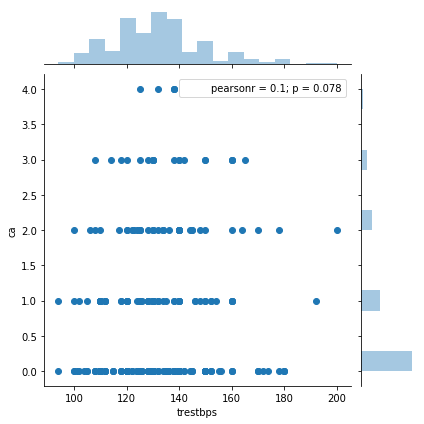

In [23]:
sns.jointplot(x='trestbps',y='ca',data =df)

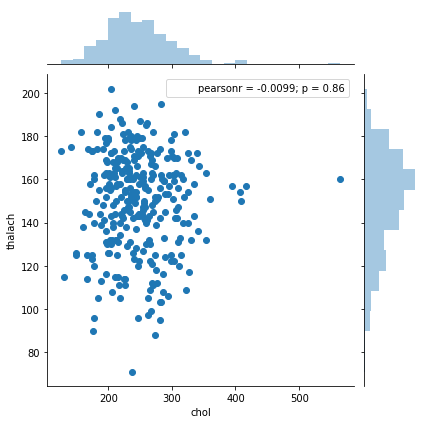

In [24]:
sns.jointplot(x='chol',y='thalach',data =df)

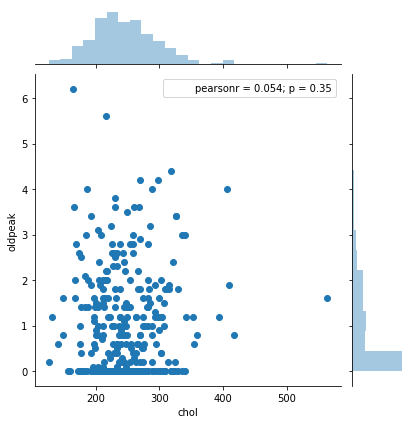

In [25]:
sns.jointplot(x='chol',y='oldpeak',data =df)

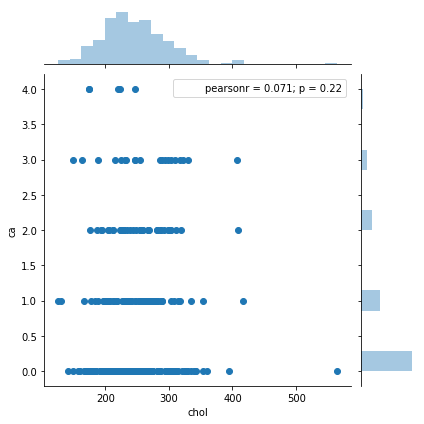

In [26]:
sns.jointplot(x='chol',y='ca',data =df)

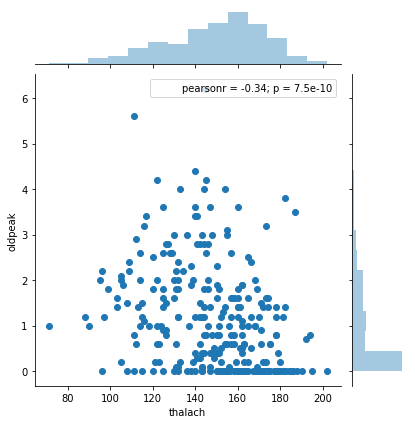

In [27]:
sns.jointplot(x='thalach',y='oldpeak',data =df)

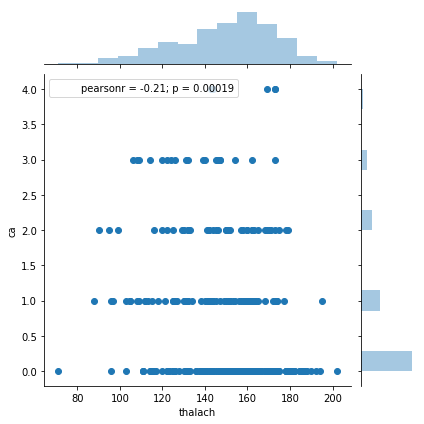

In [28]:
sns.jointplot(x='thalach',y='ca',data =df)

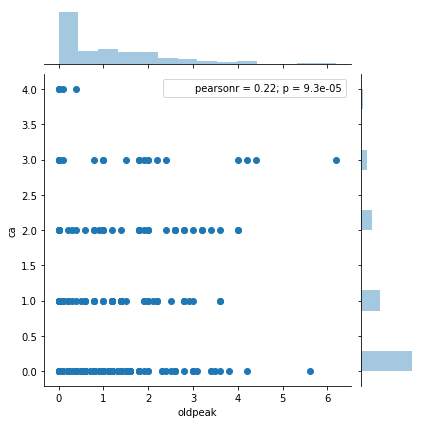

In [29]:
sns.jointplot(x='oldpeak',y='ca',data =df)

In [30]:
### hence there is no correlation among continuous variable..means these are explaining the target variable in their own way..

In [31]:
## chi- square test for independence

from scipy.stats import chi2_contingency
for i in cat_names:
    print(i)
    chi2,p,dof,ex = chi2_contingency(pd.crosstab(df['target'],df[i]))
    print(p)

sex
1.8767776216941532e-06
cp
1.3343043373050064e-17
fbs
0.7444281114149577
restecg
0.006660598773498031
exang
7.454409331235655e-14
slope
4.8306819342768186e-11
thal
2.233350721012921e-18


In [32]:
### Since the pvalue of fbs is greater than 0.05 then we will eliminate it using dimensionality reduction

df = df.drop(['fbs'],axis =1)

In [33]:
df.shape

(303, 13)

In [34]:
cont_names

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

In [35]:
cat_names

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [36]:
cat_names = ['sex', 'cp','restecg', 'exang', 'slope', 'thal']

# Feature Scaling to check distribution of data

(array([ 1.,  6., 12., 37., 27., 37., 43., 61., 38., 28., 10.,  3.]),
 array([29., 33., 37., 41., 45., 49., 53., 57., 61., 65., 69., 73., 77.]),
 <a list of 12 Patch objects>)

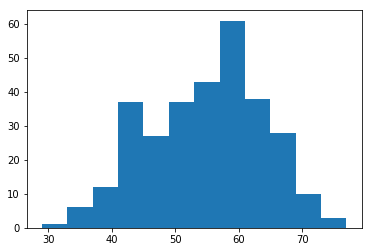

In [37]:
#Normality check

## check for normality of data one by one

%matplotlib inline
plt.hist(df['age'],bins ='auto')

(array([ 2., 11., 26., 14., 49., 33., 55., 48., 12., 24.,  3., 12.,  5.,
         2.,  5.,  0.,  1.,  1.]),
 array([ 94.        ,  99.88888889, 105.77777778, 111.66666667,
        117.55555556, 123.44444444, 129.33333333, 135.22222222,
        141.11111111, 147.        , 152.88888889, 158.77777778,
        164.66666667, 170.55555556, 176.44444444, 182.33333333,
        188.22222222, 194.11111111, 200.        ]),
 <a list of 18 Patch objects>)

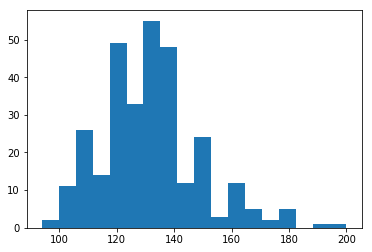

In [38]:
plt.hist(df['trestbps'],bins ='auto')

(array([ 3.,  4., 17., 23., 44., 49., 40., 42., 28., 22., 15.,  8.,  3.,
         0.,  1.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([126.  , 144.25, 162.5 , 180.75, 199.  , 217.25, 235.5 , 253.75,
        272.  , 290.25, 308.5 , 326.75, 345.  , 363.25, 381.5 , 399.75,
        418.  , 436.25, 454.5 , 472.75, 491.  , 509.25, 527.5 , 545.75,
        564.  ]),
 <a list of 24 Patch objects>)

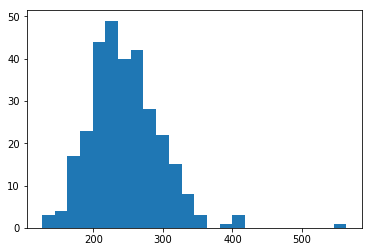

In [39]:
plt.hist(df['chol'],bins ='auto')

(array([ 1.,  1.,  6.,  8., 17., 24., 22., 39., 45., 57., 44., 28.,  8.,
         3.]), array([ 71.        ,  80.35714286,  89.71428571,  99.07142857,
        108.42857143, 117.78571429, 127.14285714, 136.5       ,
        145.85714286, 155.21428571, 164.57142857, 173.92857143,
        183.28571429, 192.64285714, 202.        ]), <a list of 14 Patch objects>)

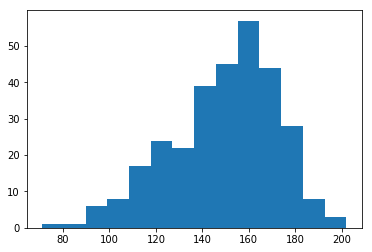

In [40]:
plt.hist(df['thalach'],bins ='auto')

(array([130.,  33.,  37.,  29.,  29.,  13.,  12.,   7.,   5.,   6.,   0.,
          0.,   1.,   1.]),
 array([0.        , 0.44285714, 0.88571429, 1.32857143, 1.77142857,
        2.21428571, 2.65714286, 3.1       , 3.54285714, 3.98571429,
        4.42857143, 4.87142857, 5.31428571, 5.75714286, 6.2       ]),
 <a list of 14 Patch objects>)

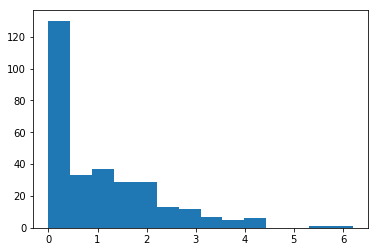

In [41]:
plt.hist(df['oldpeak'],bins ='auto')

(array([175.,   0.,   0.,  65.,   0.,   0.,   0.,  38.,   0.,   0.,  20.,
          0.,   0.,   5.]),
 array([0.        , 0.28571429, 0.57142857, 0.85714286, 1.14285714,
        1.42857143, 1.71428571, 2.        , 2.28571429, 2.57142857,
        2.85714286, 3.14285714, 3.42857143, 3.71428571, 4.        ]),
 <a list of 14 Patch objects>)

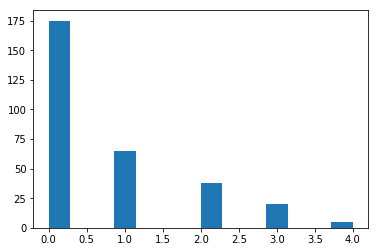

In [42]:
plt.hist(df['ca'],bins ='auto')

In [43]:
## We will apply standardisation in this dataset as it is sufferning from skewness...

## Standardisation 

for i in cont_names:
    print(i)
    df[i]=(df[i]-df[i].mean())/df[i].std()

age
trestbps
chol
thalach
oldpeak
ca


In [44]:
df.head(5)## the dataset is standardised

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.950624,1,3,0.762694,-0.255910,0,0.015417,0,1.085542,0,-0.713249,1,1
1,-1.912150,1,2,-0.092585,0.072080,1,1.630774,0,2.119067,0,-0.713249,2,1
2,-1.471723,0,1,-0.092585,-0.815424,0,0.975900,0,0.310399,2,-0.713249,2,1
3,0.179877,1,1,-0.662770,-0.198030,1,1.237849,0,-0.206364,2,-0.713249,2,1
4,0.289984,0,0,-0.662770,2.078611,1,0.582975,1,-0.378618,2,-0.713249,2,1


# Sampling

In [45]:
from sklearn.cross_validation import train_test_split

C:\Users\on846\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [46]:
x= df.values[:,0:12]
y = df.values[:,12]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

# Model Developement

In [47]:
## Decision tree for classification

from sklearn import tree
from sklearn.metrics import accuracy_score

In [48]:
# Implementing decision tree for classification:

c50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(x_train,y_train)

In [49]:
#prediction using the model and keep target variable of test data excluded

predict_c50 = c50_model.predict(x_test)

In [50]:
## Evaluation of error using confusion metrics as it is a classification problem

cm = pd.crosstab(predict_c50,y_test)

In [51]:
cm

col_0,0.0,1.0
row_0,,
0.0,18,7
1.0,7,29


In [52]:
# let us save TN,TP,FN,FP

TN=cm.iloc[0,0]
TP=cm.iloc[1,1]
FP=cm.iloc[0,1]
FN=cm.iloc[1,0]

In [53]:
accuracy_score(predict_c50,y_test)*100

77.04918032786885

In [ ]:
## Accuracy = 77%
##Specificity = 72%
##Recall = 80%
##False Negative Rate = 19%
##False Positive Rate = 28%

In [54]:
Specificity = TN/(TN+FP)

In [55]:
Specificity

0.72

In [56]:
Recall = TP/(TP+FN)

In [57]:
Recall

0.8055555555555556

In [58]:
FNR = FN/(FN+TP)

In [59]:
FNR

0.19444444444444445

In [60]:
FPR = FP/(FP+TN)

In [61]:
FPR

0.28

In [62]:
##Applying Random Forest to the dataset

from sklearn.ensemble import RandomForestClassifier
Rf_model = RandomForestClassifier(n_estimators=50).fit(x_train,y_train)

C:\Users\on846\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [63]:
prediction_rf = Rf_model.predict(x_test)

In [64]:
prediction_rf

array([0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1.])

In [65]:
## Check error metrics in this case

cm = pd.crosstab(prediction_rf,y_test)

In [66]:
cm

col_0,0.0,1.0
row_0,,
0.0,20,4
1.0,5,32


In [67]:
## Assigning values

TN = cm.iloc[0,0]
FP =cm.iloc[0,1]
FN = cm.iloc[1,0]
TP = cm.iloc[1,1]

In [68]:
accuracy_score(prediction_rf,y_test)

0.8524590163934426

In [ ]:
## Accuracy = 85%
## Specificity = 83%
## Recall = 86%
## False Positive Rate = 17%
## False Negative Rate = 13%

In [69]:
Specificity = TN/(TN+FP)

In [70]:
Specificity

0.8333333333333334

In [71]:
Recall = TP/(TP+FN)

In [72]:
Recall


0.8648648648648649

In [73]:
FPR = FP/(FP+TN)

In [74]:
FPR

0.16666666666666666

In [75]:
FNR = FN/(FN+TP)

In [76]:
FNR

0.13513513513513514

In [77]:
## Now applying Naive bayes

from sklearn.naive_bayes import GaussianNB

In [78]:
Naive_model = GaussianNB().fit(x_train,y_train)

In [79]:
predict_NB = Naive_model.predict(x_test)

In [80]:
predict_NB

array([0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 1.])

In [81]:
## Error Metrics

cm = pd.crosstab(predict_NB,y_test)

In [82]:
cm

col_0,0.0,1.0
row_0,,
0.0,22,5
1.0,3,31


In [83]:
##Assigning values

TN = cm.iloc[0,0]
FP = cm.iloc[0,1]
FN = cm.iloc[1,0]
TP = cm.iloc[1,1]

In [84]:
accuracy_score(predict_NB,y_test)

0.8688524590163934

In [ ]:
##Accuracy = 87%
##Specificity = 81%
#Recall = 91%
#False Positive Rate = 18%
#False Negative Rate = 8%

In [85]:
Specificity = TN/(TN+FP)

In [86]:
Specificity

0.8148148148148148

In [87]:
Recall = TP/(TP+FN)

In [88]:
Recall

0.9117647058823529

In [89]:
FPR = FP/(FP+TN)

In [90]:
FPR

0.18518518518518517

In [91]:
FNR = FN/(FN+TP)

In [92]:
FNR

0.08823529411764706

In [93]:
## KNN method for classification

from sklearn.neighbors import KNeighborsClassifier

In [94]:
KNN_model = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)

In [95]:
predict_KNN = KNN_model.predict(x_test)

In [96]:
predict_KNN

array([0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0.])

In [97]:
##Error Metrics and confusion metrics

cm = pd.crosstab(predict_KNN,y_test)

In [98]:
cm

col_0,0.0,1.0
row_0,,
0.0,17,4
1.0,8,32


In [99]:
## Assigning values 

TN = cm.iloc[0,0]
FP = cm.iloc[0,1]
FN = cm.iloc[1,0]
TP = cm.iloc[1,1]

In [100]:
accuracy_score(predict_KNN,y_test)

0.8032786885245902

In [117]:
#Accuracy = 80%
#Specificity = 81%
#Recall = 80%
#False Positive Rate = 19%
#False Negative Rate = 20 %

In [101]:
TN/(TN+FP)

0.8095238095238095

In [102]:
TP/(TP+FN)

0.8

In [103]:
FP/(FP+TN)

0.19047619047619047

In [104]:
FN/(FN+TP)

0.2

In [105]:
## Logistic regression model
from sklearn.linear_model import LogisticRegression

In [106]:
lm_model = LogisticRegression().fit(x_train,y_train)

In [107]:
prediction_lm = lm_model.predict(x_test)

In [108]:
prediction_lm

array([0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0.])

In [109]:
##Error metrics and confusion metrics

cm = pd.crosstab(prediction_lm,y_test)

In [110]:
cm

col_0,0.0,1.0
row_0,,
0.0,18,3
1.0,7,33


In [111]:
accuracy_score(prediction_lm,y_test)

0.8360655737704918

In [ ]:
#Accuracy = 84%
#Specificity = 81%
#Recall = 80%
#False Positive Rate = 19%
#False Negative Rate = 20%

In [113]:
TN/(TN+FP)

0.8095238095238095

In [114]:
TP/(TP+FN)

0.8

In [115]:
FP/(FP+TN)

0.19047619047619047

In [116]:
FN/(FN+TP)

0.2